In [ ]:
Veri Seti: Breast Cancer Wisconsin (Diagnostic)
Veri seti, Breast Cancer Wisconsin (Diagnostic), göğüs kanseri teşhisi için kullanılan özelliklere dayalı bir sınıflandırma problemidir. Veri seti, aşağıdaki özellikleri içeriyor:

Özellikler:
Radyolojik Ölçümler: Veriler, göğüs kanseri hücrelerinden alınan özelliklerin sayısal ölçümleridir. Bu özellikler, kanserin malign (kötü huylu) veya benign (iyi huylu) olup olmadığını anlamak için kullanılır.

Her bir örnek (satır), kanserli bir dokuya ait özellikler hakkında bilgi içerir.

Öznitelikler:

Radius (Yarıçap): Hücrelerin büyüklüğünü ölçer.

Texture (Doku): Hücrenin yüzey yapısını ölçer.

Perimeter (Çevre): Hücrenin dış sınırını ölçer.

Area (Alan): Hücrenin kapladığı alan.

Smoothness (Yumuşaklık): Hücrenin pürüzlülüğünü ölçer.

Compactness (Sıkılık): Hücrenin ne kadar yoğun olduğunu ölçer.

Concavity (Çöküklük): Hücrenin kenarlarının ne kadar çökük olduğunu ölçer.

Symmetry (Söndürme): Hücrenin simetrisini ölçer.

Fractal Dimension (Fraktal Boyut): Hücrenin karmaşıklığını ölçer.

Hedef Değişken (Target):
Diagnosis (Teşhis): Verinin hedef değişkenidir. Bu değişken, B (Benign) yani iyi huylu ve M (Malignant) yani kötü huylu olarak etiketlenmiştir.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                           f1_score, precision_score, recall_score, roc_curve, auc,
                           precision_recall_curve)
from sklearn.preprocessing import LabelBinarizer
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Plotting ayarları
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("="*60)
print("BREAST CANCER WISCONSIN DIAGNOSTIC DATASET ANALYSIS")
print("Decision Tree Based Classification")
print("="*60)

BREAST CANCER WISCONSIN DIAGNOSTIC DATASET ANALYSIS
Decision Tree Based Classification


In [22]:
# =============================================================================
# 1. VERİ YÜKLEME VE KEŞFİ
# =============================================================================

print("\n1. VERİ YÜKLEME VE KEŞİF")
print("-" * 40)

# Veri setini yükleme
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

print(f"Veri seti boyutu: {X.shape}")
print(f"Özellik sayısı: {X.shape[1]}")
print(f"Örnek sayısı: {X.shape[0]}")

# Hedef değişken analizi
print(f"\nHedef değişken dağılımı:")
print(y.value_counts())
print(f"\nHedef değişken oranları:")
print(y.value_counts(normalize=True).round(4))

# Temel istatistikler
print(f"\nVeri setinin ilk 5 satırı:")
print(X.head())


1. VERİ YÜKLEME VE KEŞİF
----------------------------------------
Veri seti boyutu: (569, 30)
Özellik sayısı: 30
Örnek sayısı: 569

Hedef değişken dağılımı:
Diagnosis
B            357
M            212
Name: count, dtype: int64

Hedef değişken oranları:
Diagnosis
B            0.6274
M            0.3726
Name: proportion, dtype: float64

Veri setinin ilk 5 satırı:
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812         

In [23]:
# =============================================================================
# 2. VERİ ÖN İŞLEME
# =============================================================================

print("\n2. VERİ ÖN İŞLEME")
print("-" * 40)

# Eksik değer kontrolü
print(f"Eksik değer sayısı: {X.isnull().sum().sum()}")
print(f"Hedef değişkende eksik değer: {y.isnull().sum().sum()}")

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nEğitim seti boyutu: {X_train.shape[0]} örnek")
print(f"Test seti boyutu: {X_test.shape[0]} örnek")
print(f"Eğitim seti hedef dağılımı:\n{y_train.value_counts()}")
print(f"Test seti hedef dağılımı:\n{y_test.value_counts()}")


2. VERİ ÖN İŞLEME
----------------------------------------
Eksik değer sayısı: 0
Hedef değişkende eksik değer: 0

Eğitim seti boyutu: 455 örnek
Test seti boyutu: 114 örnek
Eğitim seti hedef dağılımı:
Diagnosis
B            285
M            170
Name: count, dtype: int64
Test seti hedef dağılımı:
Diagnosis
B            72
M            42
Name: count, dtype: int64


In [24]:
# =============================================================================
# 3. MODEL OLUŞTURMA VE EĞİTİM
# =============================================================================

print("\n3. MODEL OLUŞTURMA VE EĞİTİM")
print("-" * 40)

# Temel Decision Tree modeli
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Hyperparameter tuning için Grid Search
print("Hyperparameter optimizasyonu yapılıyor...")
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
# En iyi parametrelerle model
best_dt = grid_search.best_estimator_
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi CV skoru: {grid_search.best_score_:.4f}")


3. MODEL OLUŞTURMA VE EĞİTİM
----------------------------------------
Hyperparameter optimizasyonu yapılıyor...
En iyi parametreler: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
En iyi CV skoru: nan


In [25]:
# =============================================================================
# 4. MODEL DEĞERLENDİRME
# =============================================================================

print("\n4. MODEL DEĞERLENDİRME")
print("-" * 40)

# Tahminler
y_pred_basic = dt_classifier.predict(X_test)
y_pred_best = best_dt.predict(X_test)
y_pred_proba_basic = dt_classifier.predict_proba(X_test)[:, 1]
y_pred_proba_best = best_dt.predict_proba(X_test)[:, 1]

# Temel metrikleri hesaplama fonksiyonu
def calculate_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} Sonuçları:")
    print("-" * 30)
    
    # Confusion Matrix değerleri
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Temel metrikler
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='M')
    recall = recall_score(y_true, y_pred, pos_label='M')  # Sensitivity
    f1 = f1_score(y_true, y_pred, pos_label='M')
    specificity = tn / (tn + fp)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Detailed Classification Report
    print(f"\nDetaylı Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))
    
    return {
        'accuracy': accuracy, 'precision': precision, 'recall': recall,
        'specificity': specificity, 'f1': f1, 'cm': cm
    }

# Model karşılaştırması
basic_metrics = calculate_metrics(y_test, y_pred_basic, "Temel Decision Tree")
best_metrics = calculate_metrics(y_test, y_pred_best, "Optimize Edilmiş Decision Tree")



4. MODEL DEĞERLENDİRME
----------------------------------------

Temel Decision Tree Sonuçları:
------------------------------
Accuracy: 0.9298
Precision: 0.9048
Recall (Sensitivity): 0.9048
Specificity: 0.9444
F1-Score: 0.9048

Detaylı Classification Report:
              precision    recall  f1-score   support

      Benign       0.94      0.94      0.94        72
   Malignant       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Optimize Edilmiş Decision Tree Sonuçları:
------------------------------
Accuracy: 0.9035
Precision: 0.9429
Recall (Sensitivity): 0.7857
Specificity: 0.9722
F1-Score: 0.8571

Detaylı Classification Report:
              precision    recall  f1-score   support

      Benign       0.89      0.97      0.93        72
   Malignant       0.94      0.79      0.86        42

    accuracy                           0.


5. GÖRSELLEŞTİRMELER OLUŞTURULUYOR...
----------------------------------------


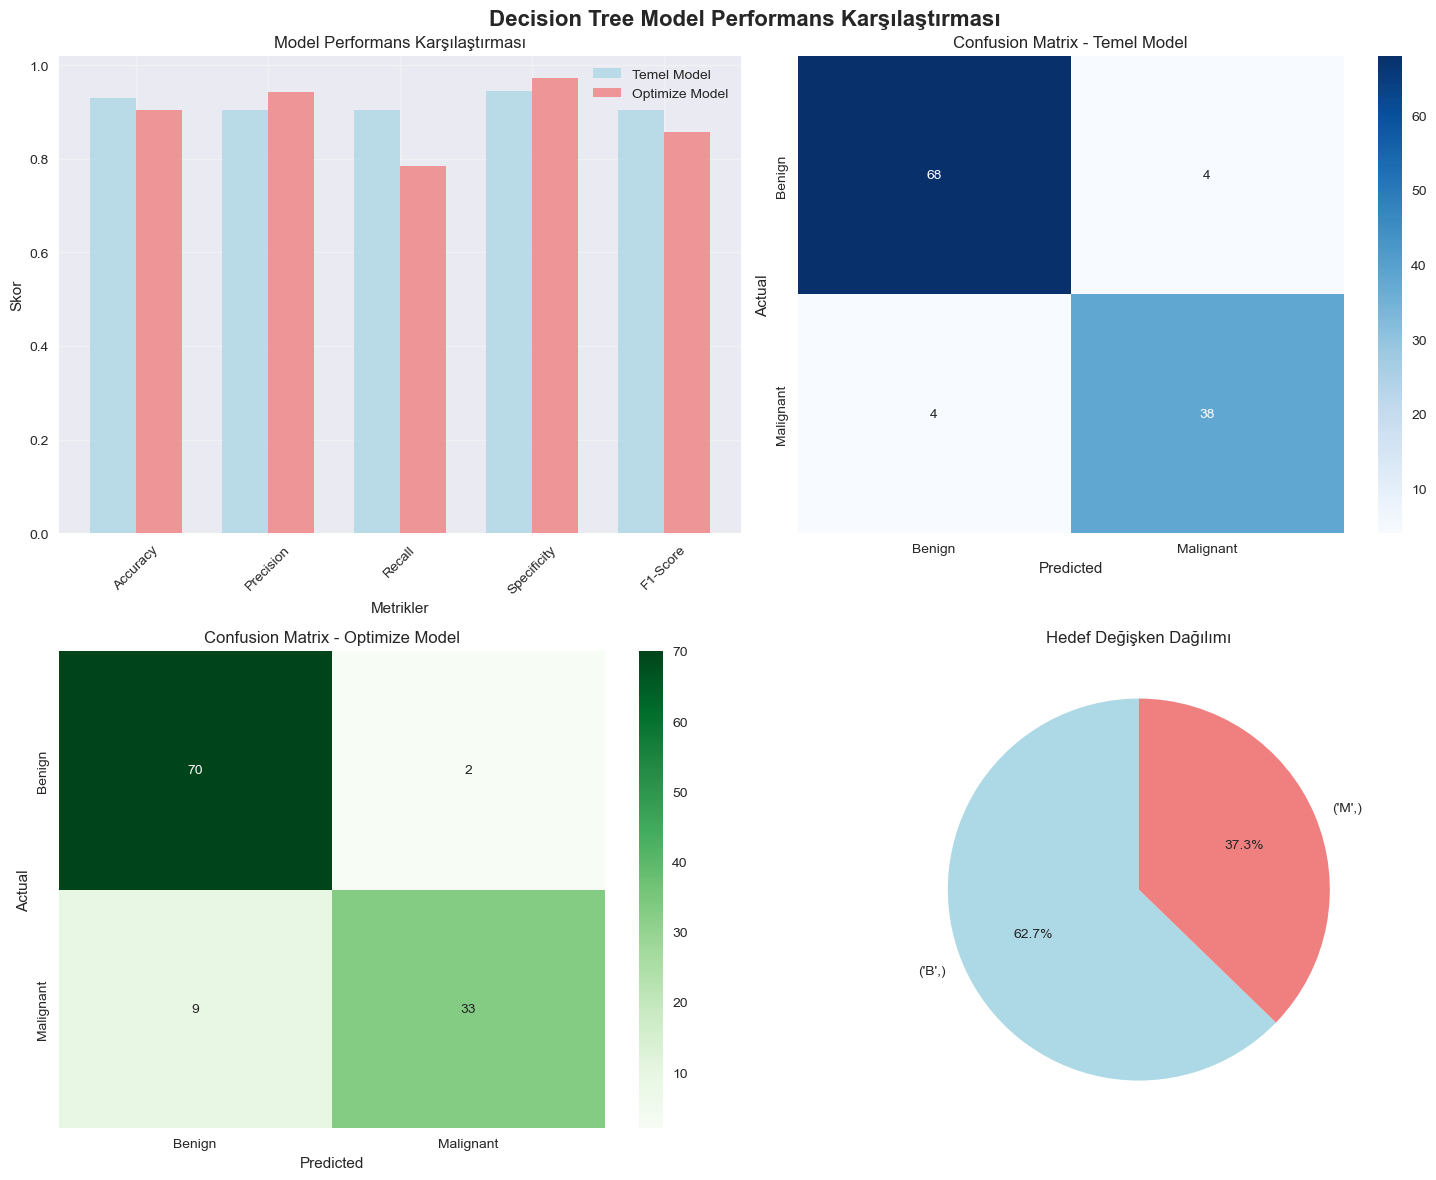

In [27]:
# =============================================================================
# 5. GÖRSELLEŞTİRMELER
# =============================================================================

print("\n5. GÖRSELLEŞTİRMELER OLUŞTURULUYOR...")
print("-" * 40)

# Figure 1: Model Karşılaştırma Metrikleri
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Decision Tree Model Performans Karşılaştırması', fontsize=16, fontweight='bold')

# Metrik karşılaştırması
metrics_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score']
basic_values = [basic_metrics['accuracy'], basic_metrics['precision'], 
                basic_metrics['recall'], basic_metrics['specificity'], basic_metrics['f1']]
best_values = [best_metrics['accuracy'], best_metrics['precision'], 
               best_metrics['recall'], best_metrics['specificity'], best_metrics['f1']]

x = np.arange(len(metrics_names))
width = 0.35

axes[0,0].bar(x - width/2, basic_values, width, label='Temel Model', alpha=0.8, color='lightblue')
axes[0,0].bar(x + width/2, best_values, width, label='Optimize Model', alpha=0.8, color='lightcoral')
axes[0,0].set_xlabel('Metrikler')
axes[0,0].set_ylabel('Skor')
axes[0,0].set_title('Model Performans Karşılaştırması')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(metrics_names, rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
# Confusion Matrix - Temel Model
sns.heatmap(basic_metrics['cm'], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], ax=axes[0,1])
axes[0,1].set_title('Confusion Matrix - Temel Model')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# Confusion Matrix - Optimize Model
sns.heatmap(best_metrics['cm'], annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], ax=axes[1,0])
axes[1,0].set_title('Confusion Matrix - Optimize Model')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

# Hedef değişken dağılımı
y_counts = y.value_counts()
axes[1,1].pie(y_counts.values, labels=y_counts.index, autopct='%1.1f%%', 
              colors=['lightblue', 'lightcoral'], startangle=90)
axes[1,1].set_title('Hedef Değişken Dağılımı')

plt.tight_layout()
plt.show()

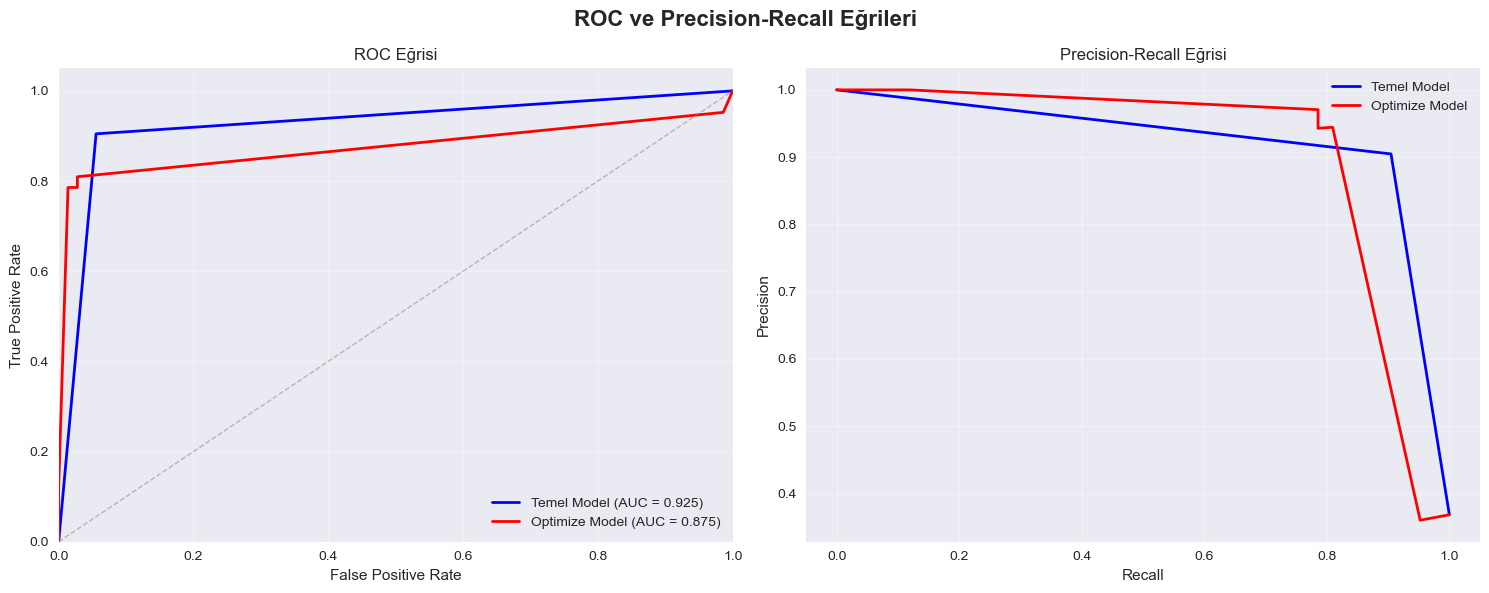

In [29]:
# Figure 2: ROC ve Precision-Recall Eğrileri
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('ROC ve Precision-Recall Eğrileri', fontsize=16, fontweight='bold')

# ROC Curve
# Label encoding (M=1, B=0)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test.replace({'M': 1, 'B': 0}))

fpr_basic, tpr_basic, _ = roc_curve(y_test_bin, y_pred_proba_basic)
fpr_best, tpr_best, _ = roc_curve(y_test_bin, y_pred_proba_best)
roc_auc_basic = auc(fpr_basic, tpr_basic)
roc_auc_best = auc(fpr_best, tpr_best)

axes[0].plot(fpr_basic, tpr_basic, color='blue', lw=2, 
             label=f'Temel Model (AUC = {roc_auc_basic:.3f})')
axes[0].plot(fpr_best, tpr_best, color='red', lw=2, 
             label=f'Optimize Model (AUC = {roc_auc_best:.3f})')
axes[0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', alpha=0.5)
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Eğrisi')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)
# Precision-Recall Curve
precision_basic, recall_basic, _ = precision_recall_curve(y_test_bin, y_pred_proba_basic)
precision_best, recall_best, _ = precision_recall_curve(y_test_bin, y_pred_proba_best)

axes[1].plot(recall_basic, precision_basic, color='blue', lw=2, label='Temel Model')
axes[1].plot(recall_best, precision_best, color='red', lw=2, label='Optimize Model')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Eğrisi')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


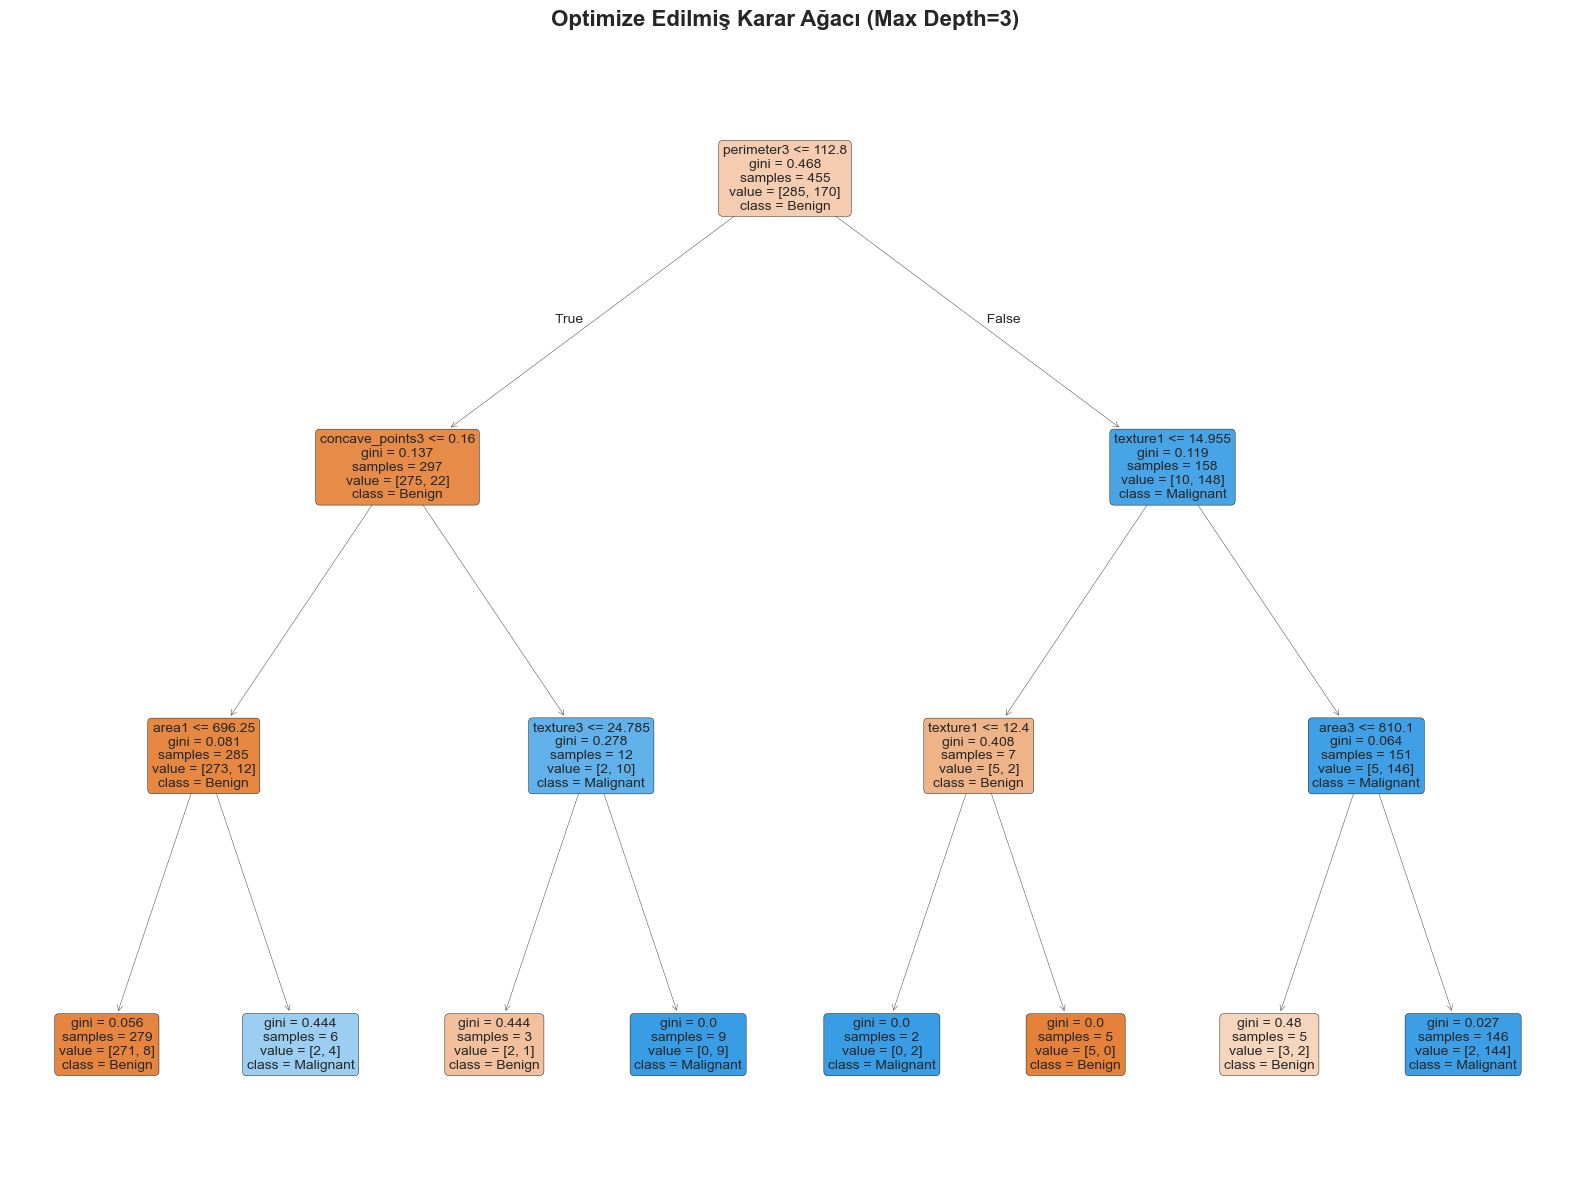

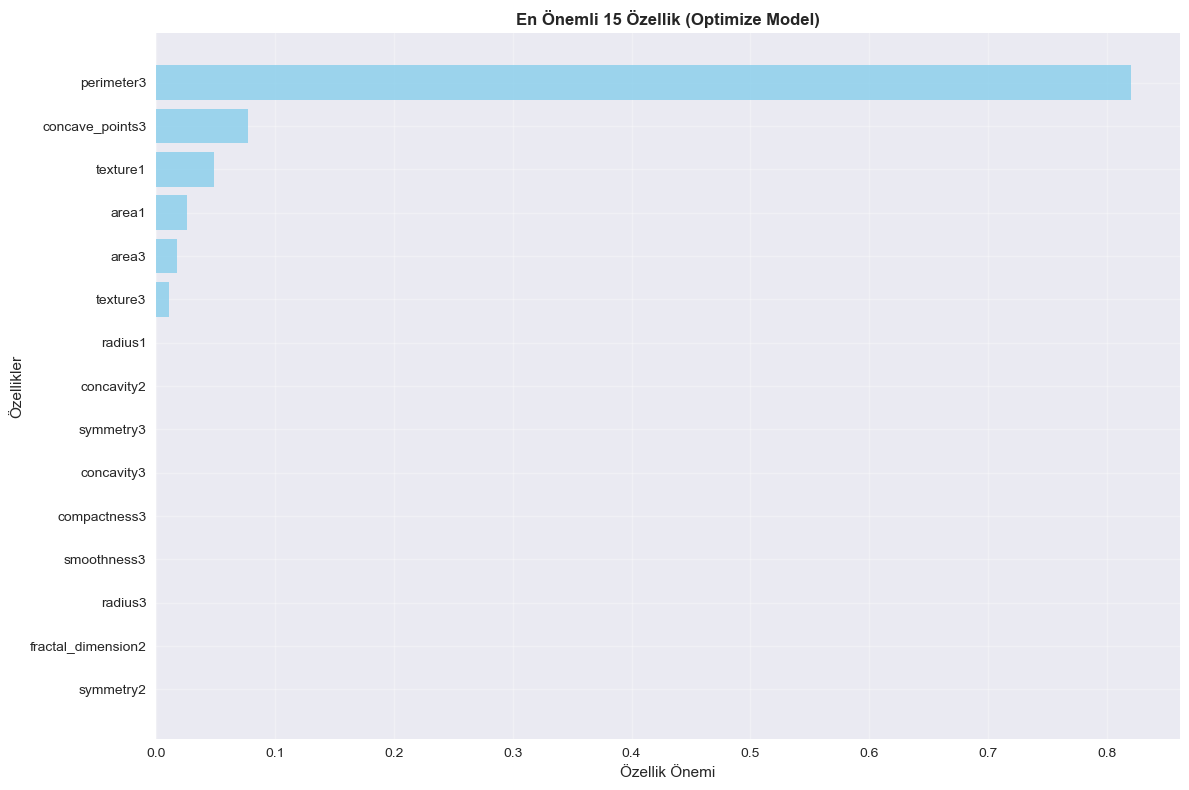

In [37]:
# Figure 3: Decision Tree Visualization (Sadece optimize model için)
plt.figure(figsize=(20, 15))
plot_tree(best_dt, filled=True, feature_names=X.columns, 
          class_names=['Benign', 'Malignant'], rounded=True, fontsize=10, max_depth=3)
plt.title("Optimize Edilmiş Karar Ağacı (Max Depth=3)", fontsize=16, fontweight='bold')
plt.show()

# Figure 4: Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'], color='skyblue', alpha=0.8)
plt.xlabel('Özellik Önemi')
plt.ylabel('Özellikler')
plt.title('En Önemli 15 Özellik (Optimize Model)', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [32]:
# =============================================================================
# 6. SONUÇ ÖZETİ
# =============================================================================

print("\n6. SONUÇ ÖZETİ")
print("=" * 60)

print(f"\n📊 VERİ SETİ BİLGİLERİ:")
print(f"   • Toplam örnek sayısı: {X.shape[0]}")
print(f"   • Özellik sayısı: {X.shape[1]}")

malignant_count = (y == 'M').sum().iloc[0] if hasattr((y == 'M').sum(), 'iloc') else (y == 'M').sum()
benign_count = (y == 'B').sum().iloc[0] if hasattr((y == 'B').sum(), 'iloc') else (y == 'B').sum()
malignant_pct = (y == 'M').mean().iloc[0] * 100 if hasattr((y == 'M').mean(), 'iloc') else (y == 'M').mean() * 100
benign_pct = (y == 'B').mean().iloc[0] * 100 if hasattr((y == 'B').mean(), 'iloc') else (y == 'B').mean() * 100

print(f"   • Malignant (Kötü huylu): {malignant_count} (%{malignant_pct:.1f})")
print(f"   • Benign (İyi huylu): {benign_count} (%{benign_pct:.1f})")

print(f"\n🎯 MODEL PERFORMANSI:")
print(f"   Temel Model:")
print(f"     • Accuracy: {basic_metrics['accuracy']:.4f}")
print(f"     • F1-Score: {basic_metrics['f1']:.4f}")
print(f"     • Sensitivity: {basic_metrics['recall']:.4f}")
print(f"     • Specificity: {basic_metrics['specificity']:.4f}")

print(f"\n   Optimize Model:")
print(f"     • Accuracy: {best_metrics['accuracy']:.4f}")
print(f"     • F1-Score: {best_metrics['f1']:.4f}")
print(f"     • Sensitivity: {best_metrics['recall']:.4f}")
print(f"     • Specificity: {best_metrics['specificity']:.4f}")

print(f"\n🔧 EN İYİ PARAMETRELER:")
for param, value in grid_search.best_params_.items():
    print(f"     • {param}: {value}")

print(f"\n📈 ÖNEMLİ BULGULAR:")
print(f"   • En önemli özellik: {feature_importance.iloc[0]['feature']}")
print(f"   • ROC AUC (Optimize): {roc_auc_best:.4f}")
print(f"   • Model, %{best_metrics['recall']*100:.1f} oranında kötü huylu tümörleri doğru tespit ediyor")
print(f"   • Model, %{best_metrics['specificity']*100:.1f} oranında iyi huylu tümörleri doğru sınıflandırıyor")

print("\n" + "="*60)
print("ANALİZ TAMAMLANDI! 🎉")
print("="*60)


6. SONUÇ ÖZETİ

📊 VERİ SETİ BİLGİLERİ:
   • Toplam örnek sayısı: 569
   • Özellik sayısı: 30
   • Malignant (Kötü huylu): 212 (%37.3)
   • Benign (İyi huylu): 357 (%62.7)

🎯 MODEL PERFORMANSI:
   Temel Model:
     • Accuracy: 0.9298
     • F1-Score: 0.9048
     • Sensitivity: 0.9048
     • Specificity: 0.9444

   Optimize Model:
     • Accuracy: 0.9035
     • F1-Score: 0.8571
     • Sensitivity: 0.7857
     • Specificity: 0.9722

🔧 EN İYİ PARAMETRELER:
     • criterion: gini
     • max_depth: 3
     • min_samples_leaf: 1
     • min_samples_split: 2

📈 ÖNEMLİ BULGULAR:
   • En önemli özellik: perimeter3
   • ROC AUC (Optimize): 0.8750
   • Model, %78.6 oranında kötü huylu tümörleri doğru tespit ediyor
   • Model, %97.2 oranında iyi huylu tümörleri doğru sınıflandırıyor

ANALİZ TAMAMLANDI! 🎉
